<a href="https://colab.research.google.com/github/MrVersatile007/Kaggle-Titanic/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1010]:
#Let's get our hands dirty
#TITANIC UISNG LOGISTIC ML

START WITH COLLECTING DATA

In [1011]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1012]:
titanic_data = pd.read_csv("train[1].csv")
titanic_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [1013]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1014]:
titanic_data.size

10692

COLLECTION IS COMPLETED

ANALYSING DATA 

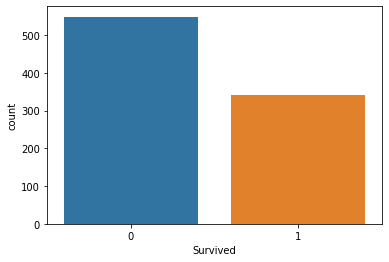

In [1015]:
# our target variable is to check survival
sns.countplot(x="Survived", data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


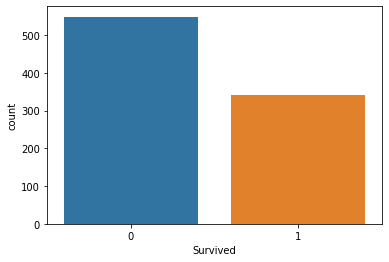

In [1016]:
#another way
sns.countplot(titanic_data["Survived"])

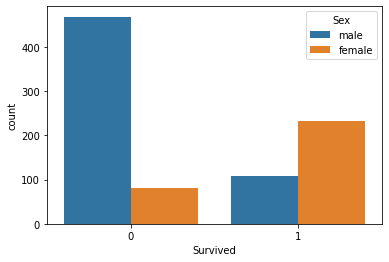

In [1017]:
#2nd attribute is sex
sns.countplot(x="Survived", hue= "Sex", data = titanic_data)
#looks like men had a bad time

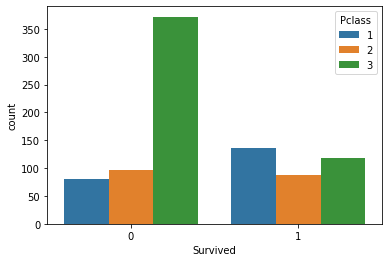

In [1018]:
#3rd attribute is Pclass
sns.countplot(x="Survived", hue= "Pclass", data= titanic_data) 

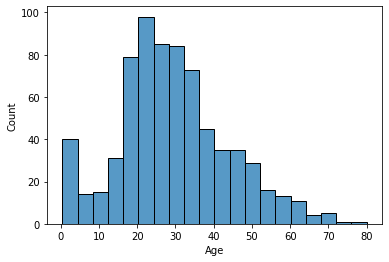

In [1019]:
#4th attribute is age
#sns.countplot(x="Survived", hue="Age", data= titanic_data)
#THIS IS REAL BAD WAY !
#HISTOGRAM IS GOOD HERE !
sns.histplot(x= "Age", data = titanic_data)


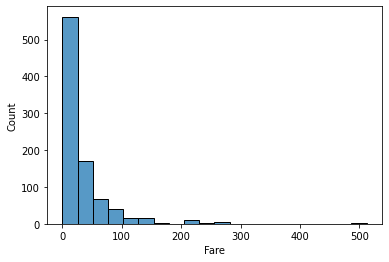

In [1020]:
#5th attribute is Fare
sns.histplot(x= "Fare", data= titanic_data, bins=20)

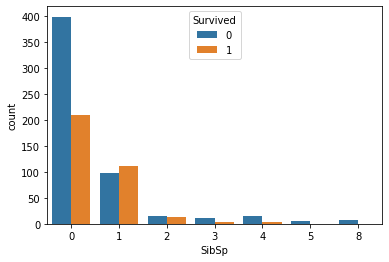

In [1021]:
#6th attribute is Sibsp
sns.countplot(x="SibSp", hue = "Survived", data=titanic_data)
#there are mostly with 0 siblings and 0 spouses and they survived more

DATA ANALYSIS IS COMPLETED

LET'S START DATA WRANGLING

In [1022]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1023]:
#first check for null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

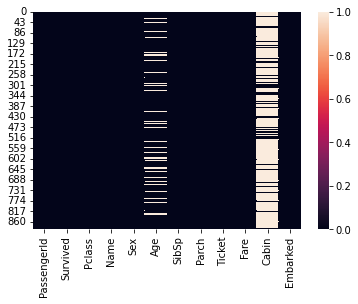

In [1024]:
#try to check through heat map
sns.heatmap(titanic_data.isnull())
#most of the cabin data is null drop it, it is useless
#also drop null records  

In [1025]:
titanic_data.drop(["Cabin"], axis=1, inplace=True)

In [1026]:
#missing values are in Age and Fare
#Mask to access the null part of the age based on Pclass
mask1=(titanic_data.Pclass==1) & (titanic_data.Age.isnull())
mask2=(titanic_data.Pclass==2) & (titanic_data.Age.isnull())
mask3=(titanic_data.Pclass==3) & (titanic_data.Age.isnull())

#Fill the Age with median based on Pclass
titanic_data.loc[mask1,'Age']=titanic_data[titanic_data.Pclass==1]['Age'].median()
titanic_data.loc[mask2,'Age']=titanic_data[titanic_data.Pclass==2]['Age'].median()
titanic_data.loc[mask3,'Age']=titanic_data[titanic_data.Pclass==3]['Age'].median()
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [1027]:
#they are just two entries drop those null values
titanic_data= titanic_data.dropna()

In [1028]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1029]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1030]:
#We can't draw insights from Name, Ticket, Passenger Id so drop them 
titanic_data.drop(["Name", "Ticket", "PassengerId"],axis=1, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1031]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1032]:
#Passenger class, sex, Embarked are categorical data so we need to create dummies
titanic_data= pd.get_dummies(titanic_data, drop_first= True)

#our pandas automatically created dummies for categorical data... 
#but we know passenger class is categorical even it has numerics
#so we need to do manually for P class

In [1033]:
Pclss= pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pclss

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [1034]:
titanic_data = pd.concat([titanic_data,Pclss], axis=1)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,0,0
888,0,3,24.0,1,2,23.4500,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,0,0


In [1035]:
titanic_data =titanic_data.drop(['Pclass'], axis=1)
#don't forget about axis=1
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


DATA WRANGLING IS DONE

LET'S TRAIN OUR DATA

In [1036]:
x=titanic_data.drop("Survived", axis=1)
y=titanic_data["Survived"]

In [1037]:
from sklearn.model_selection import train_test_split

In [1038]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle=True, random_state=2)

In [1039]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(x_train,y_train)
y_predictions = my_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [1040]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       170
           1       0.82      0.74      0.78        97

    accuracy                           0.85       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



In [1041]:
print(confusion_matrix(y_test, y_predictions))

[[154  16]
 [ 25  72]]


In [1042]:
print(accuracy_score(y_test, y_predictions))

0.846441947565543


In [1043]:
test_data = pd.read_csv("test[1].csv")

In [1044]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1045]:
test_data.size

4598

In [1046]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

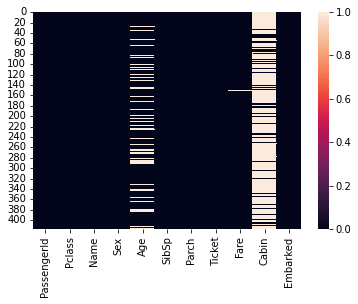

In [1047]:
#Check Heatmap
sns.heatmap(test_data.isnull())

In [1048]:
#useless Cabin data drop it
test_data= test_data.drop("Cabin",axis=1)

FILLING MISSING VALUES

In [1049]:
#missing values are in Age and Fare
#Mask to access the null part of the age based on Pclass
mask1=(test_data.Pclass==1) & (test_data.Age.isnull())
mask2=(test_data.Pclass==2) & (test_data.Age.isnull())
mask3=(test_data.Pclass==3) & (test_data.Age.isnull())

#Fill the Age with median based on Pclass
test_data.loc[mask1,'Age']=test_data[test_data.Pclass==1]['Age'].median()
test_data.loc[mask2,'Age']=test_data[test_data.Pclass==2]['Age'].median()
test_data.loc[mask3,'Age']=test_data[test_data.Pclass==3]['Age'].median()
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [1050]:
#now lets fill fare null value
test_data.loc[test_data.Fare.isnull()]
test_data.fillna(test_data.Fare[test_data.Pclass==3].median(), inplace=True)
#What we did here? we filled null value (only fare in this case) with median of Pclass 3 because the null value in fare is the record hhaving Pclass 3
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1051]:
test_passid = test_data.loc[:,'PassengerId']
test_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
test_data.dropna(inplace=True)
test_data
test_passid.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [1052]:
#Passenger class, sex, Embarked are categorical data so we need to create dummies
test_data= pd.get_dummies(test_data, drop_first= True)
Pclss= pd.get_dummies(test_data['Pclass'], drop_first=True)
test_data = pd.concat([test_data,Pclss], axis=1)
test_data.drop(["Pclass"], axis=1, inplace= True)

In [1053]:
test_data.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [1054]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [1055]:
y= titanic_data["Survived"]
x= titanic_data.drop(["Survived"], axis=1)

my_model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [1056]:
test_prediction= my_model.predict(test_data)
test_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1057]:
#passenger_id = pd.DataFrame({'PassengerId':test_passid['PassengerId']})
Survived = pd.DataFrame({'Survived':test_prediction},dtype='int64')
answer= pd.concat([test_passid, Survived], axis=1)
answer.dropna(inplace=True)

In [1058]:
answer = answer.astype(int)
answer.to_csv("Submission.csv", index=False)
answer 
#It's Ready to submit !

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1059]:
sample= pd.read_csv("gender_submission[1].csv")

In [1060]:
sample
#my result looks like the submission sample so? GOOD TO GO !
#lets Submit !

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1061]:
my_submission = pd.read_csv('Submission.csv')
my_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
